In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv('voice.csv')

In [28]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'label' column | 1-Male 0-Female
df['label_encoded'] = label_encoder.fit_transform(df['label']) 
df = df.drop("label", axis=1)
df = df.rename(columns={'label_encoded': 'label'})

# Display the DataFrame with the encoded column
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt','sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']], df['label'], test_size=0.2,random_state=42)

print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (2534, 20)
y_train shape: (2534,)
X_test shape: (634, 20)
y_test shape: (634,)


In [31]:
X_train.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [32]:
from sklearn.neighbors import KNeighborsClassifier

#Checking the accuracy of model for k=1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Test score for k=1: " + str(round((knn.score(X_test,y_test)*100), 4)) + '%')

Test score for k=1: 69.7161%


In [33]:
#Using elbow method to find a good value of 'k' and thus improve the accuracy of the model
error_rate = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_k = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_k != y_test))

Text(0, 0.5, 'Error Rate')

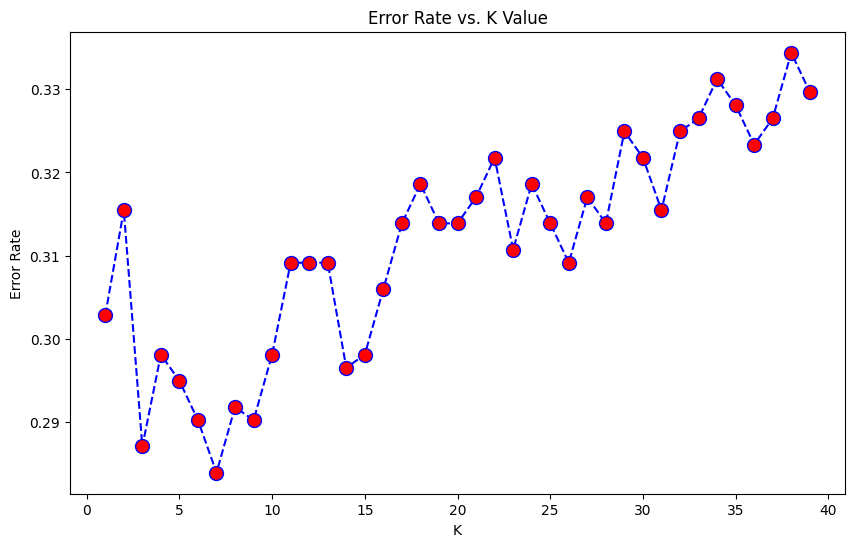

In [34]:
#plotting error_rate vs k
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
#from the graph it is clear that the optimum value of k occurs when the error is minimum
#so the value k = 5 will give maximum accuracy
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train, y_train)
print("Test score for k=5: " + str(round((knn.score(X_test,y_test)*100), 4)) + '%')

Test score for k=5: 70.5047%


In [36]:
# Save KNN model to pickle file
import joblib
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [37]:
import librosa
from scipy.stats import skew, kurtosis, entropy, mode

import aubio

# Load the audio file
audio_file_path = 'amy.wav'
audio_data, sample_rate = librosa.load(audio_file_path)

# ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
# 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
# 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']

# Extract features using Librosa
meanfreq = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate).mean()
sd = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate).std()
median = np.median(audio_data)
Q25 = np.percentile(audio_data, 25)
Q75 = np.percentile(audio_data, 75)
IQR = Q75 - Q25
skewness = skew(audio_data)
kurt = kurtosis(audio_data)
sp_ent = entropy(np.abs(audio_data))
sfm = librosa.feature.spectral_flatness(y=audio_data).mean()
mode_value, _ = mode(audio_data, keepdims=True)
mode_ = float(mode_value[0])
centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate).mean()
meanfun = librosa.effects.harmonic(audio_data).mean()
minfun = librosa.effects.preemphasis(audio_data).min()
maxfun = librosa.effects.preemphasis(audio_data).max()
meandom = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate).mean()
mindom = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate).min()
maxdom = librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate).max()
dfrange = maxdom - mindom


# Use aubio for pitch estimation
pitch_o = aubio.pitch("yin", 2048, 2048, sample_rate)
pitch_o.set_unit("midi")
pitch_o.set_tolerance(0.8)

# Initialize an array to store pitch values
pitches = []

# Process audio data and extract pitch values
hop_size = 2048
total_frames = len(audio_data) // hop_size
for frame in range(total_frames):
    samples = audio_data[frame * hop_size: (frame + 1) * hop_size]
    pitch = pitch_o(samples)[0]
    confidence = pitch_o.get_confidence()
    
    # Append pitch values to the array
    if confidence > 0.5:  # Adjust the confidence threshold as needed
        pitches.append(pitch)
    else:
        pitches.append(np.nan)

# Use the median pitch value as modindx
modindx = np.nanmedian(pitches)

# Create a DataFrame with the extracted features
new_voice_sample = pd.DataFrame({
    'meanfreq': meanfreq,
    'sd': sd,
    'median': median,
    'Q25': Q25,
    'Q75': Q75,
    'IQR': IQR,
    'skew': skewness,
    'kurt': kurt,
    'sp.ent': sp_ent,
    'sfm': sfm,
    'mode': mode_,
    'centroid': centroid,
    'meanfun': meanfun,
    'minfun': minfun,
    'maxfun': maxfun,
    'meandom': meandom,
    'mindom': mindom,
    'maxdom': maxdom,
    'dfrange': dfrange,
    'modindx': modindx
}, index=[0])  # Use index=[0] to create a single-row DataFrame

# Load the pre-trained KNN model
knn_model = joblib.load('knn_model.pkl')

# Make predictions on the new audio sample
prediction = knn_model.predict(new_voice_sample)

# Print the predicted label
print("Predicted Label: ", prediction)


Predicted Label:  [0]
